<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-07-30 07:39:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  48.8MB/s    in 3.1s    

2025-07-30 07:39:19 (48.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


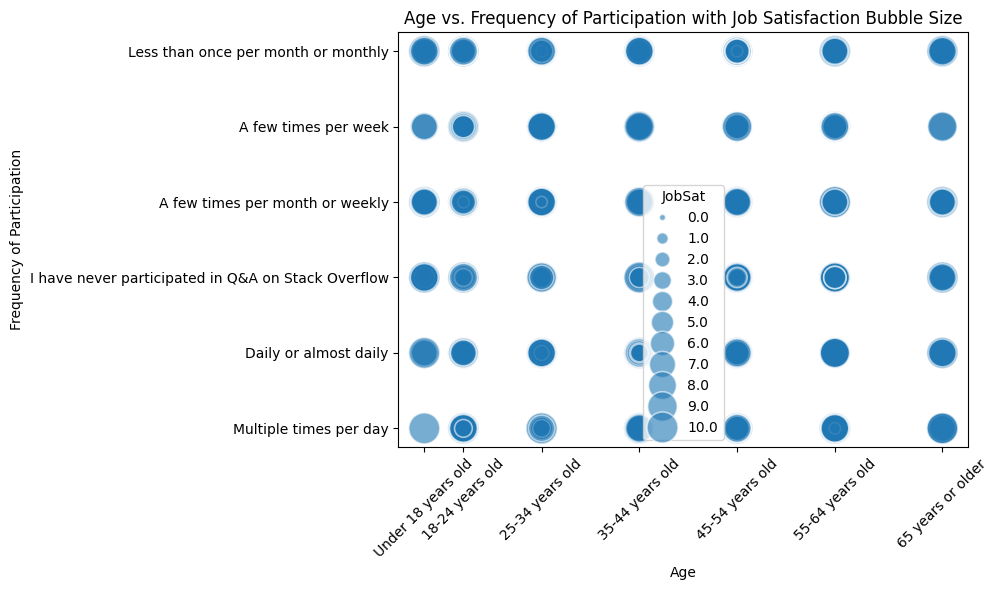

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

df_filtered = df.dropna(subset=['AgeNum', 'SOPartFreq', 'JobSat'])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x='AgeNum',
    y='SOPartFreq',
    size='JobSat',
    sizes=(20, 500),    # scale bubble sizes between 20 and 500 points^2
    alpha=0.6,
    legend='full'
)

# Set x-axis ticks to show age group labels for clarity
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
             '45-54 years old', '55-64 years old', '65 years or older']
age_ticks = [age_mapping[age] for age in age_order]
plt.xticks(ticks=age_ticks, labels=age_order, rotation=45)

plt.xlabel('Age')
plt.ylabel('Frequency of Participation')
plt.title('Age vs. Frequency of Participation with Job Satisfaction Bubble Size')
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


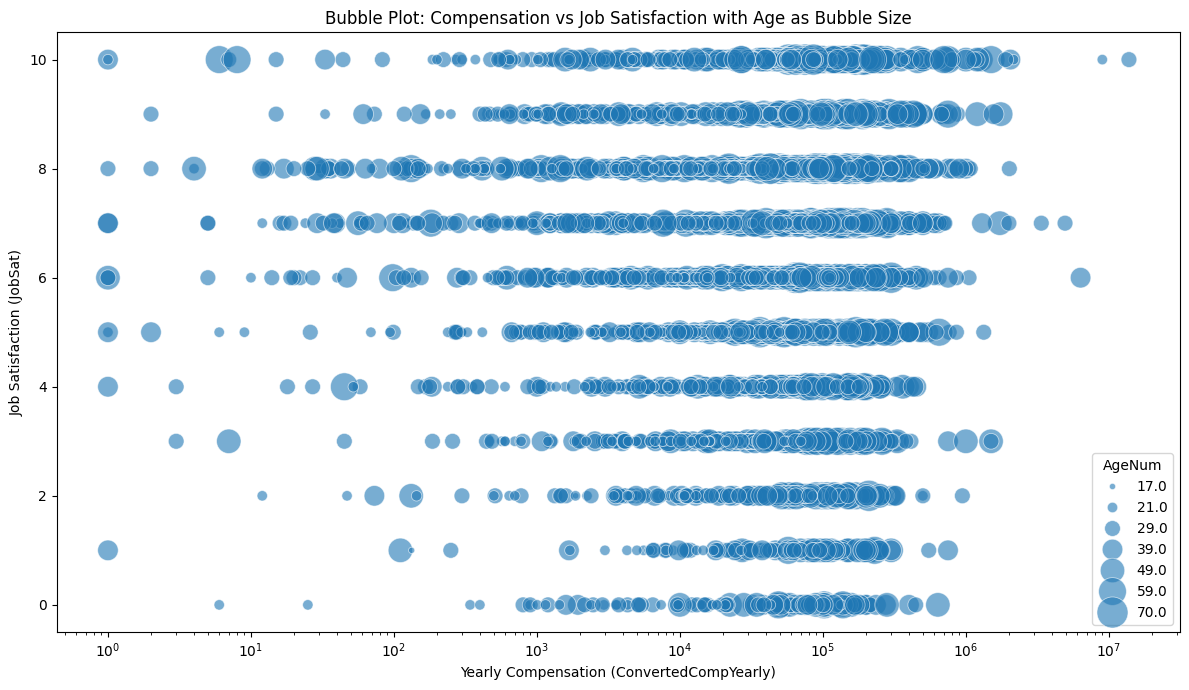

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming age mapping is done as before:
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Filter out rows with missing data in relevant columns
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'AgeNum'])

# Convert JobSat and ConvertedCompYearly to numeric if not done yet
df_filtered.loc[:, 'JobSat'] = pd.to_numeric(df_filtered['JobSat'], errors='coerce')
df_filtered.loc[:, 'ConvertedCompYearly'] = pd.to_numeric(df_filtered['ConvertedCompYearly'], errors='coerce')

# Drop any rows that became NaN after conversion
df_filtered = df_filtered.dropna(subset=['JobSat', 'ConvertedCompYearly'])

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSat',
    size='AgeNum',
    sizes=(20, 500),        # scale bubble size between 20 and 500
    alpha=0.6,
    legend='full'
)

plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSat)')
plt.title('Bubble Plot: Compensation vs Job Satisfaction with Age as Bubble Size')

# Optionally, set x-axis to log scale if compensation is skewed
plt.xscale('log')
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



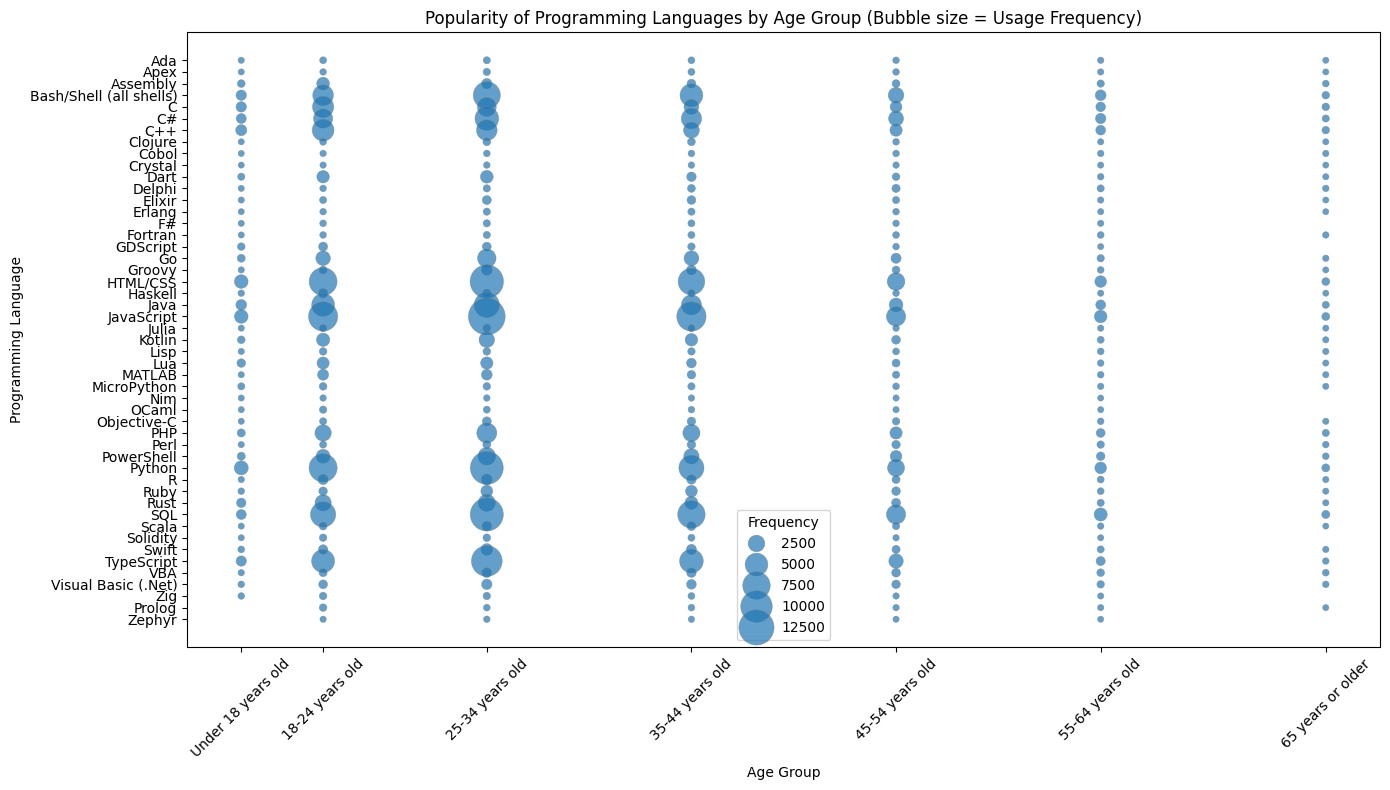

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Map age groups to numeric for plotting (if not already mapped)
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Step 2: Drop rows with missing AgeNum or LanguageHaveWorkedWith
df_filtered = df.dropna(subset=['AgeNum', 'LanguageHaveWorkedWith']).copy()

# Step 3: Split languages into separate rows to count frequencies per age group
df_expanded = df_filtered.assign(Language=df_filtered['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Step 4: Clean whitespace from language names
df_expanded['Language'] = df_expanded['Language'].str.strip()

# Step 5: Count frequency of each language by age group (AgeNum)
freq = df_expanded.groupby(['AgeNum', 'Language']).size().reset_index(name='Frequency')

# Optional: Filter out very low-frequency entries to reduce clutter
freq = freq[freq['Frequency'] > 5]

# Step 6: Plot bubble plot with AgeNum vs Language
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=freq,
    x='AgeNum',
    y='Language',
    size='Frequency',
    sizes=(20, 700),
    alpha=0.7,
    legend='brief',
    edgecolor='gray'
)

# Step 7: Improve x-axis labels with age group names for readability
age_labels = {v: k for k, v in age_mapping.items() if v is not None}
plt.xticks(ticks=list(age_labels.keys()), labels=list(age_labels.values()), rotation=45)

plt.xlabel('Age Group')
plt.ylabel('Programming Language')
plt.title('Popularity of Programming Languages by Age Group (Bubble size = Usage Frequency)')
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


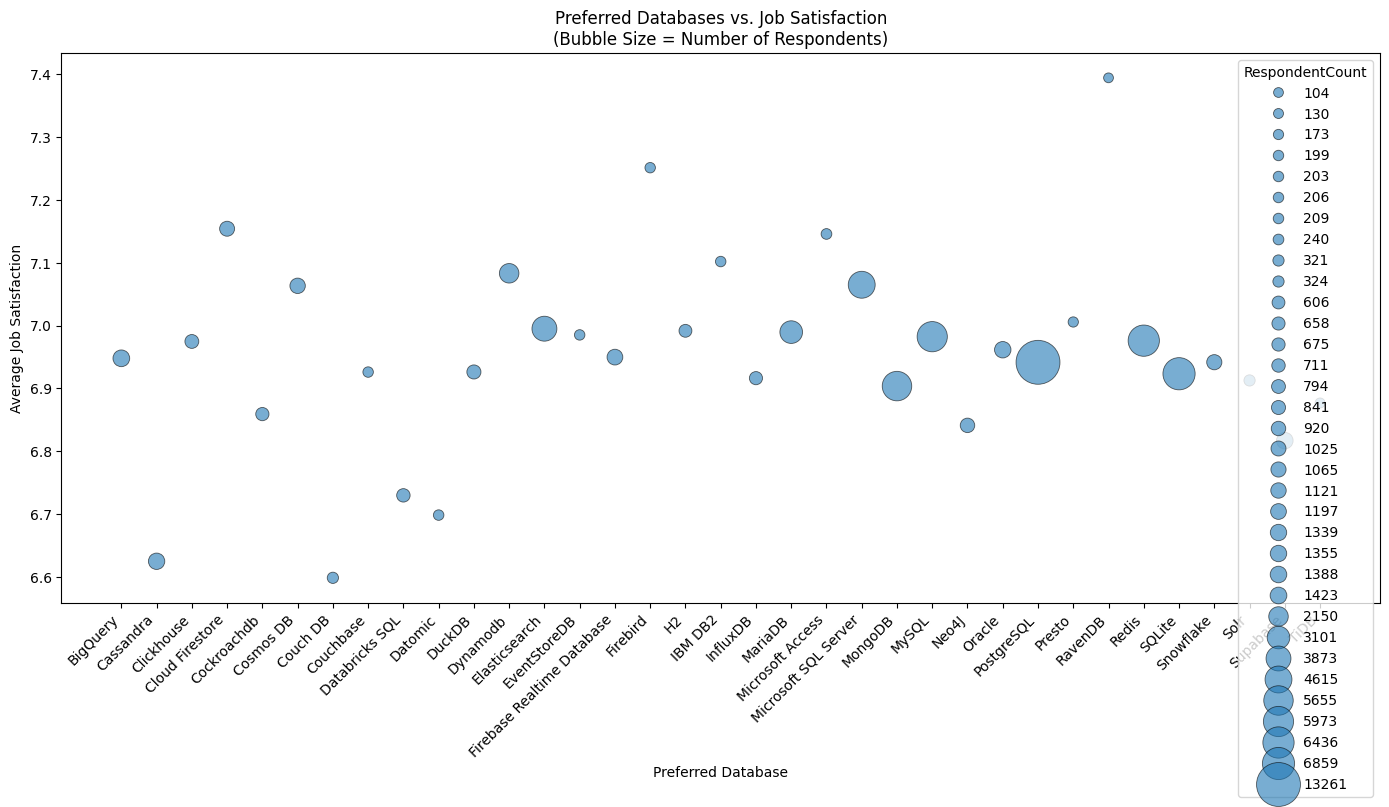

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Drop rows missing required columns
df_filtered = df.dropna(subset=['DatabaseWantToWorkWith', 'JobSat']).copy()

# Convert JobSat to numeric if not already
df_filtered['JobSat'] = pd.to_numeric(df_filtered['JobSat'], errors='coerce')

# Step 2: Split the preferred databases and explode rows
df_expanded = df_filtered.assign(
    Database=df_filtered['DatabaseWantToWorkWith'].str.split(';')
).explode('Database')

# Clean whitespace around database names
df_expanded['Database'] = df_expanded['Database'].str.strip()

# Step 3: Group by Database to calculate:
# - number of respondents (counts)
# - average job satisfaction
summary = df_expanded.groupby('Database').agg(
    RespondentCount=('JobSat', 'size'),
    AvgJobSat=('JobSat', 'mean')
).reset_index()

# Optional: Filter databases with few respondents to avoid clutter
summary = summary[summary['RespondentCount'] > 10]

# Step 4: Bubble plot with average job satisfaction on y-axis,
# database names on x-axis, and bubble size by respondent count
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=summary,
    x='Database',
    y='AvgJobSat',
    size='RespondentCount',
    sizes=(50, 1000),
    alpha=0.6,
    legend='full',
    edgecolor='black'
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Preferred Database')
plt.ylabel('Average Job Satisfaction')
plt.title('Preferred Databases vs. Job Satisfaction\n(Bubble Size = Number of Respondents)')
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


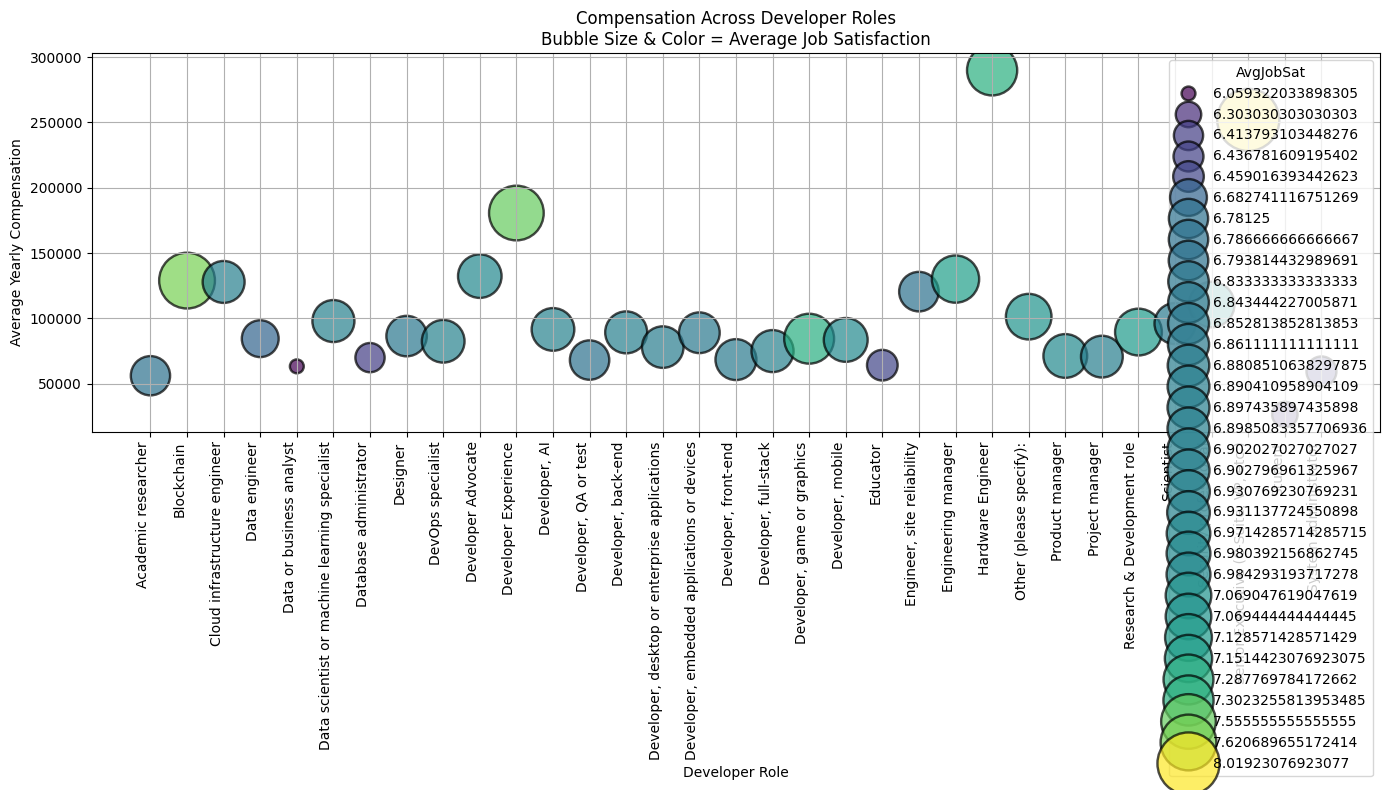

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter and create a copy to avoid warnings
df_filtered = df.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSat']).copy()

# Convert to numeric types
df_filtered['ConvertedCompYearly'] = pd.to_numeric(df_filtered['ConvertedCompYearly'], errors='coerce')
df_filtered['JobSat'] = pd.to_numeric(df_filtered['JobSat'], errors='coerce')

# Drop any rows where conversion resulted in NaN
df_filtered = df_filtered.dropna(subset=['ConvertedCompYearly', 'JobSat'])

# Explode DevType column
df_exploded = df_filtered.assign(DevType=df_filtered['DevType'].str.split(';')).explode('DevType')
df_exploded['DevType'] = df_exploded['DevType'].str.strip()

# Aggregate mean compensation and mean job satisfaction per DevType
role_summary = df_exploded.groupby('DevType').agg(
    AvgCompensation=('ConvertedCompYearly', 'mean'),
    AvgJobSat=('JobSat', 'mean'),
    RespondentCount=('JobSat', 'size')
).reset_index()

# Optional: Filter roles with small sample size to reduce clutter, e.g., at least 10 respondents
role_summary = role_summary[role_summary['RespondentCount'] >= 10]

# Plotting
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=role_summary,
    x='DevType',
    y='AvgCompensation',
    size='AvgJobSat',
    sizes=(100, 2000),
    alpha=0.7,
    hue='AvgJobSat',
    palette='viridis',
    edgecolor='black',
    legend='full'
)

plt.xticks(rotation=90, ha='right')
plt.xlabel('Developer Role')
plt.ylabel('Average Yearly Compensation')
plt.title('Compensation Across Developer Roles\nBubble Size & Color = Average Job Satisfaction')
plt.tight_layout()
plt.grid(True)
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


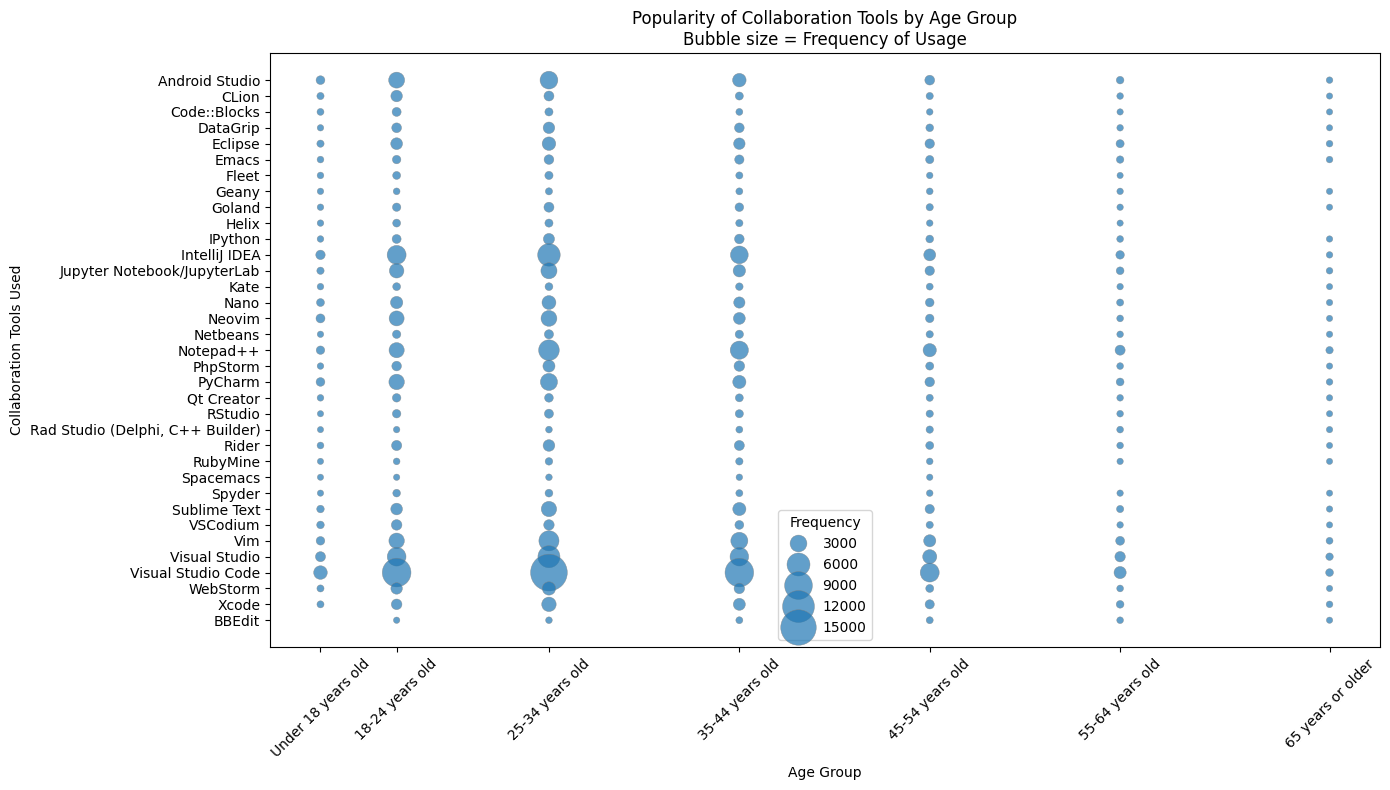

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Map age groups to numeric or keep as categories
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Step 2: Drop rows missing AgeNum or collaboration tools data
df_filtered = df.dropna(subset=['AgeNum', 'NEWCollabToolsHaveWorkedWith']).copy()

# Step 3: Split and explode the collaboration tools column
df_expanded = df_filtered.assign(
    Tool=df_filtered['NEWCollabToolsHaveWorkedWith'].str.split(';')
).explode('Tool')

# Clean whitespace from tool names
df_expanded['Tool'] = df_expanded['Tool'].str.strip()

# Step 4: Count frequency of each tool by age group
freq = df_expanded.groupby(['AgeNum', 'Tool']).size().reset_index(name='Frequency')

# Optionally filter out low-frequency to reduce clutter
freq = freq[freq['Frequency'] > 5]

# Step 5: Plot bubble plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=freq,
    x='AgeNum',
    y='Tool',
    size='Frequency',
    sizes=(20, 700),
    alpha=0.7,
    legend='brief',
    edgecolor='gray'
)

# Label x-axis with age groups for better interpretation
age_labels = {v: k for k, v in age_mapping.items() if v is not None}
plt.xticks(ticks=list(age_labels.keys()), labels=list(age_labels.values()), rotation=45)

plt.xlabel('Age Group')
plt.ylabel('Collaboration Tools Used')
plt.title('Popularity of Collaboration Tools by Age Group\nBubble size = Frequency of Usage')
plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



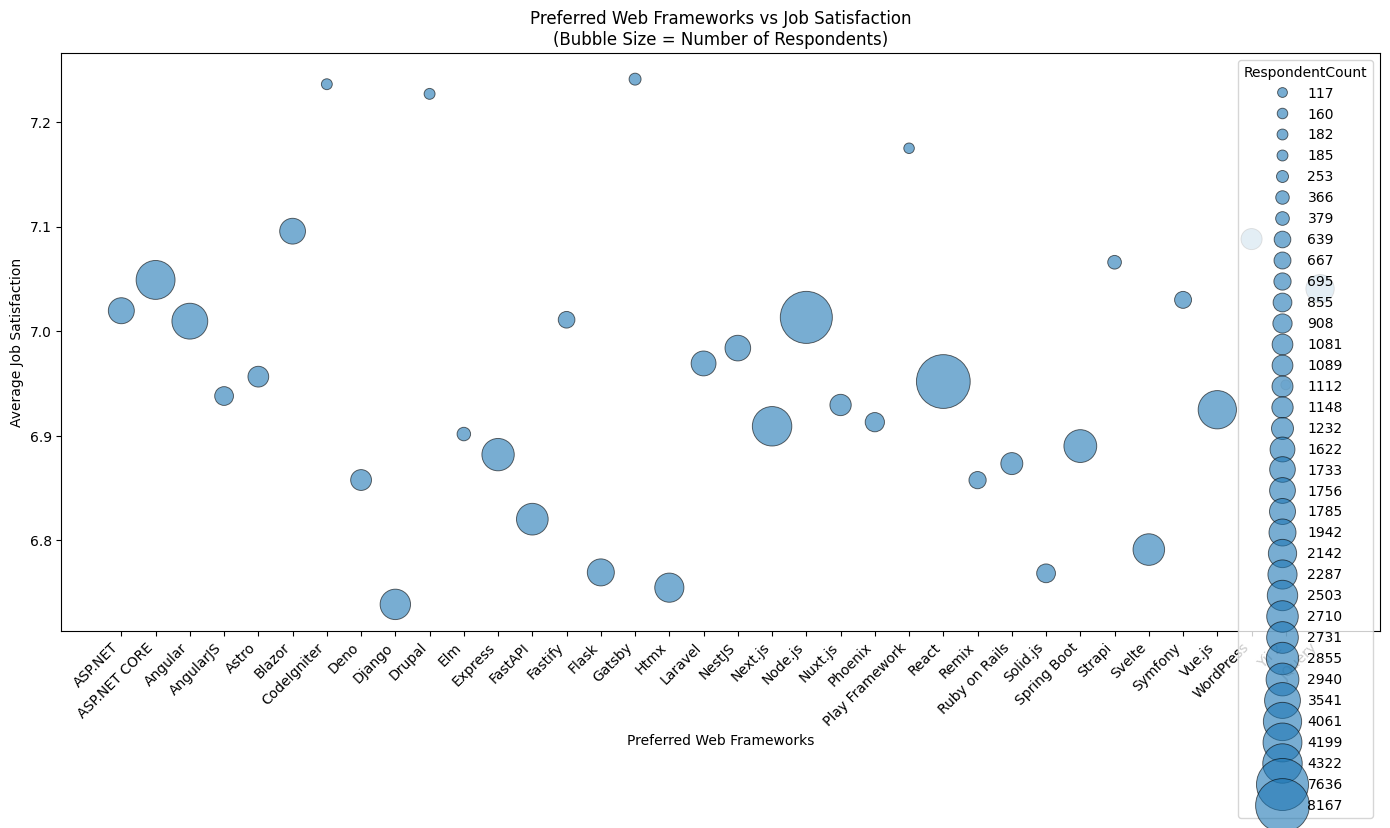

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Drop rows with missing values in the needed columns
df_filtered = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat']).copy()

# Step 2: Convert JobSat to numeric, just in case
df_filtered['JobSat'] = pd.to_numeric(df_filtered['JobSat'], errors='coerce')

# Drop any rows where conversion failed
df_filtered = df_filtered.dropna(subset=['JobSat'])

# Step 3: Split the semicolon-separated web frameworks into separate rows
df_expanded = df_filtered.assign(
    Webframe=df_filtered['WebframeWantToWorkWith'].str.split(';')
).explode('Webframe')

# Clean any whitespace
df_expanded['Webframe'] = df_expanded['Webframe'].str.strip()

# Step 4: Group by web framework to calculate:
# - Number of respondents preferring each framework
# - Average job satisfaction for each framework
summary = df_expanded.groupby('Webframe').agg(
    RespondentCount=('JobSat', 'size'),
    AvgJobSat=('JobSat', 'mean')
).reset_index()

# Optional: Filter out frameworks with very few respondents to keep plot readable
summary = summary[summary['RespondentCount'] > 10]

# Step 5: Create the bubble plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=summary,
    x='Webframe',
    y='AvgJobSat',
    size='RespondentCount',
    sizes=(50, 1500),        # scale bubble sizes between 50 and 1500 for visibility
    alpha=0.6,
    legend='full',
    edgecolor='black'
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Preferred Web Frameworks')
plt.ylabel('Average Job Satisfaction')
plt.title('Preferred Web Frameworks vs Job Satisfaction\n(Bubble Size = Number of Respondents)')
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



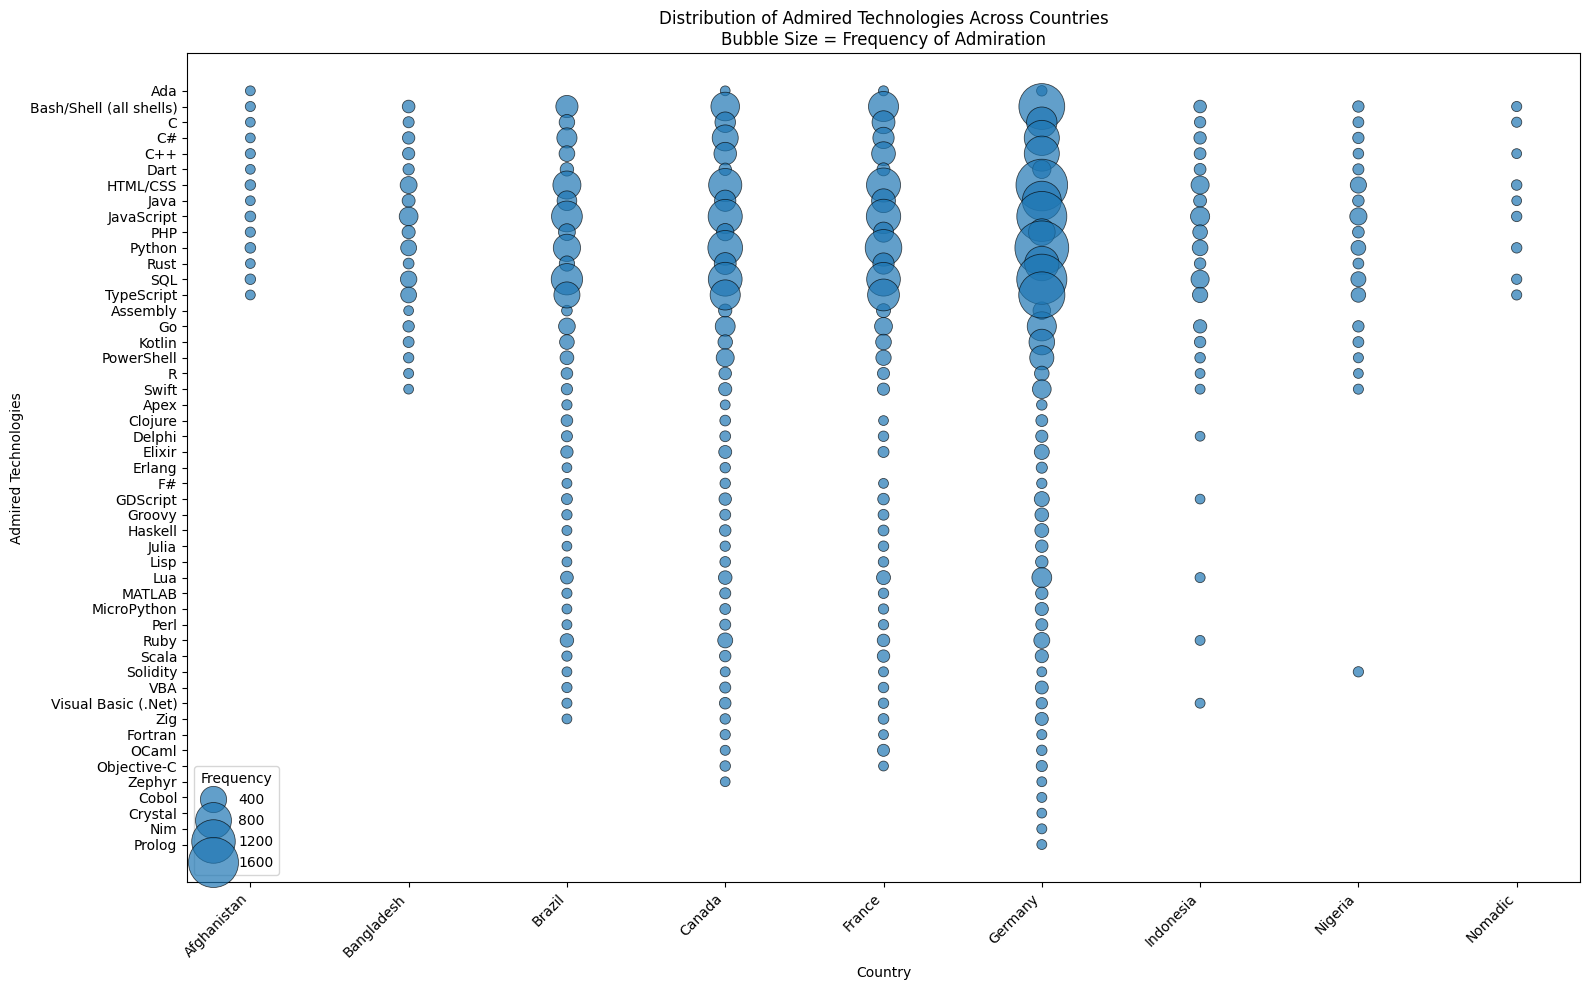

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter out rows missing Country or LanguageAdmired
df_filtered = df.dropna(subset=['Country', 'LanguageAdmired']).copy()

# Step 2: Split the semicolon-separated admired languages into separate rows
df_expanded = df_filtered.assign(
    Language=df_filtered['LanguageAdmired'].str.split(';')
).explode('Language')

# Step 3: Clean whitespace
df_expanded['Language'] = df_expanded['Language'].str.strip()

# Step 4: Group by Country and Language, count frequency
freq = df_expanded.groupby(['Country', 'Language']).size().reset_index(name='Frequency')

# Optional: Filter to include only top N countries or top languages for clarity (can be adjusted)
top_countries = freq['Country'].value_counts().head(10).index
freq = freq[freq['Country'].isin(top_countries)]

# Optional: filter out languages with very low frequency to reduce clutter
freq = freq[freq['Frequency'] > 5]

# Step 5: Create bubble plot
plt.figure(figsize=(16, 10))
sns.scatterplot(
    data=freq,
    x='Country',
    y='Language',
    size='Frequency',
    sizes=(50, 1500),  # adjust min and max bubble sizes
    alpha=0.7,
    legend='brief',
    edgecolor='black'
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Admired Technologies')
plt.title('Distribution of Admired Technologies Across Countries\nBubble Size = Frequency of Admiration')
plt.tight_layout()
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
